<a href="https://colab.research.google.com/github/Athithiyanmr/Athithiyanmr/blob/main/Chennai_house_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

NAME: ATHITHIYAN.M.R

---


BATCH: D14

---


PROJECT: CHENNAI HOUSE PRICE PREDICTION

---



**Importing the Necessary packages required**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



---



---



In [ ]:
data1= pd.read_csv("/content/train-chennai-sale.csv")



---



---



In [ ]:
data1.head(5)

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250




---



---



In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DATE_SALE      7109 non-null   object 
 4   DIST_MAINROAD  7109 non-null   int64  
 5   N_BEDROOM      7108 non-null   float64
 6   N_BATHROOM     7104 non-null   float64
 7   N_ROOM         7109 non-null   int64  
 8   SALE_COND      7109 non-null   object 
 9   PARK_FACIL     7109 non-null   object 
 10  DATE_BUILD     7109 non-null   object 
 11  BUILDTYPE      7109 non-null   object 
 12  UTILITY_AVAIL  7109 non-null   object 
 13  STREET         7109 non-null   object 
 14  MZZONE         7109 non-null   object 
 15  QS_ROOMS       7109 non-null   float64
 16  QS_BATHROOM    7109 non-null   float64
 17  QS_BEDROOM     7109 non-null   float64
 18  QS_OVERA



---



---



**Droping the unwanted columns**

In [ ]:
data1=data1.drop(['PRT_ID','REG_FEE','COMMIS'],axis=1)



---



---



**Finding the null values**

In [ ]:
pd.DataFrame(data1.isna().sum()).T

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE
0,0,0,0,0,1,5,0,0,0,0,0,0,0,0,0,0,0,48,0




---



---



**Handling the null values**

In [ ]:
data1['N_BEDROOM']=data1['N_BEDROOM'].fillna(data1['N_BEDROOM'].mean())
data1['N_BATHROOM']=data1['N_BATHROOM'].fillna(data1['N_BATHROOM'].mean())
data1['QS_OVERALL']=data1['QS_OVERALL'].fillna(data1['QS_OVERALL'].mean())

In [ ]:
data1['N_BEDROOM'] = np.floor(data1['N_BEDROOM'])
data1['N_BATHROOM'] = np.floor(data1['N_BATHROOM'])



---



---



**Correcting the spelling error data's**

In [ ]:
data1['AREA'].replace(['Ana Nagar','Ann Nagar','Karapakam','Chrompt','Chrmpet','Chormpet','Adyr','Velchery','KKNagar','TNagar'],
['Anna Nagar','Anna Nagar','Karapakkam','Chrompet','Chrompet','Chrompet','Adyar','Velachery','KK Nagar','T Nagar'],
inplace=True)
data1['SALE_COND'].replace(['Ab Normal','Partiall','PartiaLl','Adj Land'],['AbNormal','Partial','Partial','AdjLand'],inplace=True)
data1['PARK_FACIL'].replace(['Noo'],['No'],inplace=True)
data1['STREET'].replace(['Pavd','NoAccess'],['Paved','No Access'],inplace=True)
data1['UTILITY_AVAIL'].replace(['NoSewr ','NoSeWa','All Pub'],['No Sewer','No Sewer','AllPub'],inplace=True)
data1['BUILDTYPE'].replace(['Comercial','Other'],['Commercial','Others'],inplace=True)



---



---



**Exploratory Data Analysis(EDA)**


***Univariate Analysis***

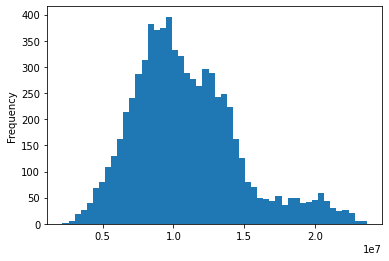

In [ ]:
data1['SALES_PRICE'].plot.hist(bins = 50)

* From the above plot, data distribution is sightly skewed on rightside 


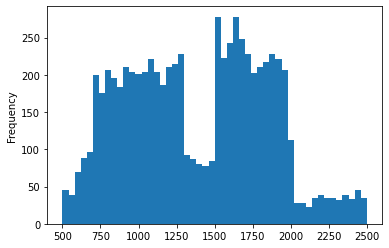

In [ ]:
data1['INT_SQFT'].plot.hist(bins = 50)

* From the plot, More no of houses builted in the range of 750 to 1200 and 1500 to 2000 sqrt.

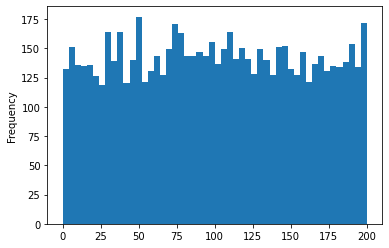

In [ ]:
data1['DIST_MAINROAD'].plot.hist(bins = 50)

* The distribution of points from the above feature is not linear.

Chrompet      23.941483
Karapakkam    19.215079
KK Nagar      14.024476
Velachery     13.799409
Anna Nagar    11.084541
Adyar         10.887607
T Nagar        7.047405
Name: AREA, dtype: float64

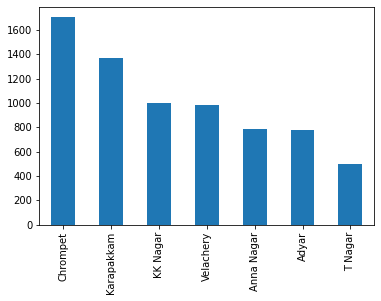

In [ ]:
data1["AREA"].value_counts().plot(kind="bar")
data1['AREA'].value_counts()/len(data1)*100

* More no of houses are built in chrompet followed by karapakkam, kk nagar, velachery, anna nagar, adyar and t nagar.

1.0    53.397102
2.0    33.084822
3.0     9.945140
4.0     3.572936
Name: N_BEDROOM, dtype: float64

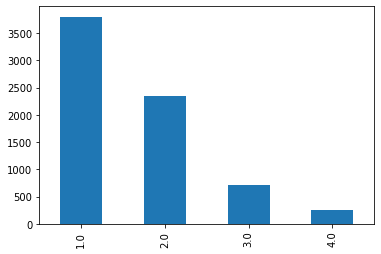

In [ ]:
data1['N_BEDROOM'].value_counts().plot(kind ="bar")
data1['N_BEDROOM'].value_counts()/len(data1)*100

1.0    78.688986
2.0    21.311014
Name: N_BATHROOM, dtype: float64

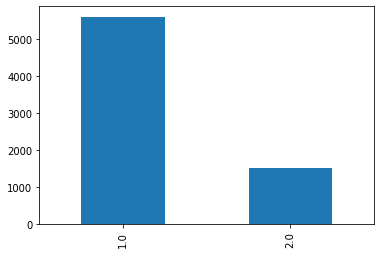

In [ ]:
data1['N_BATHROOM'].value_counts().plot(kind="bar")
data1['N_BATHROOM'].value_counts()/len(data1)*100

4    36.052891
3    29.891687
5    17.527078
2    12.955409
6     3.572936
Name: N_ROOM, dtype: float64

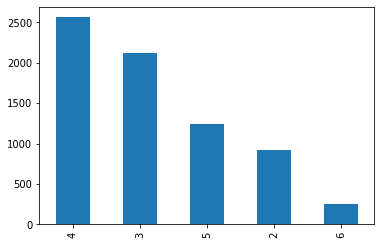

In [ ]:
data1['N_ROOM'].value_counts().plot(kind = 'bar')
data1['N_ROOM'].value_counts()/len(data1)*100

Yes    50.457167
No     49.542833
Name: PARK_FACIL, dtype: float64

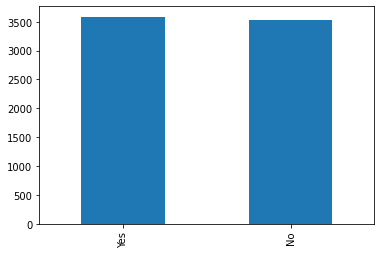

In [ ]:
data1['PARK_FACIL'].value_counts().plot(kind="bar")
data1['PARK_FACIL'].value_counts()/len(data1)*100

* There is equal number of distribution in Parking facility and nowdays parking facility is important in chennai city.

House         34.378956
Others        32.859755
Commercial    32.761289
Name: BUILDTYPE, dtype: float64

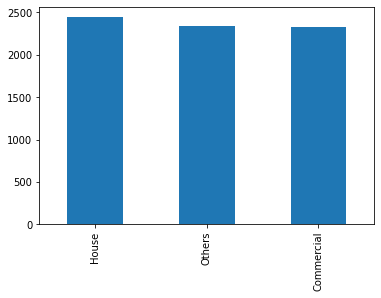

In [ ]:
data1['BUILDTYPE'].value_counts().plot(kind="bar")
data1['BUILDTYPE'].value_counts()/len(data1)*100

* More no of houses are builtin types are House followed by others and commercial.



---



---



**Converting  Object  --->  Datetime**

In [ ]:
data1['DATE_SALE']=pd.to_datetime(data1['DATE_SALE'])
data1['DATE_BUILD']=pd.to_datetime(data1['DATE_BUILD'])
data1['BUILD_YEAR'] = data1['DATE_BUILD'].dt.year
data1['SALE_YEAR'] = data1['DATE_SALE'].dt.year
data1["HOUSE_AGE"]=data1['SALE_YEAR']-data1['BUILD_YEAR']

Adding one feature ( House_Age ) with the help of DATE_SALE and DATE_BUILD

---
---



***Bi variate Analysis***

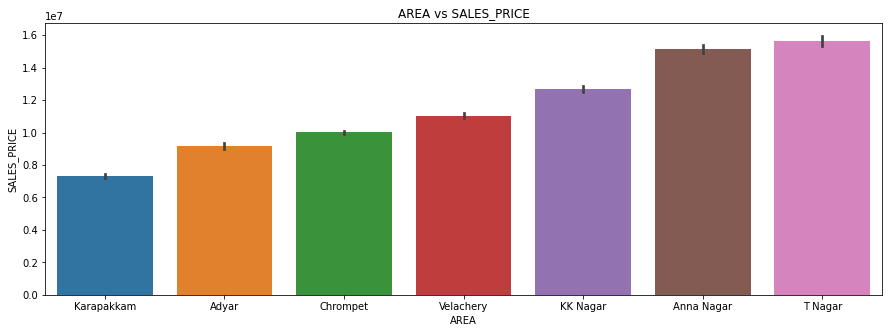

In [ ]:
plt.figure(figsize=(15,5))
plt.title('AREA vs SALES_PRICE')
sns.barplot(x='AREA',y='SALES_PRICE',data= data1,order=data1.groupby('AREA')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['AREA'])

* There is a linear relationship between the Area and Sales_price.
* T Nagar Area houses having higher value than other areas and Karapakkam having least value.


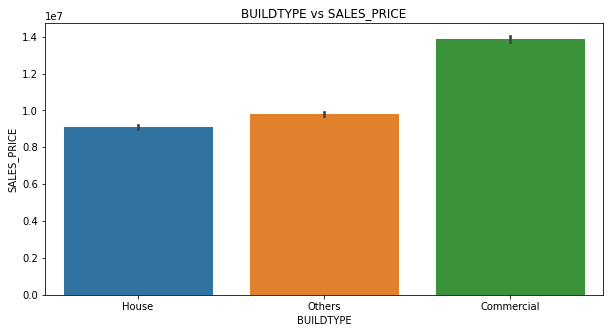

In [ ]:
plt.figure(figsize=(10,5))
plt.title('BUILDTYPE vs SALES_PRICE')
sns.barplot(x='BUILDTYPE',y='SALES_PRICE',data=data1,order=data1.groupby('BUILDTYPE')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['BUILDTYPE'])

* There is **no linear relationship** between the three different categories and **commercial** is having very much higher value than the other two categories of **House** and **others**.


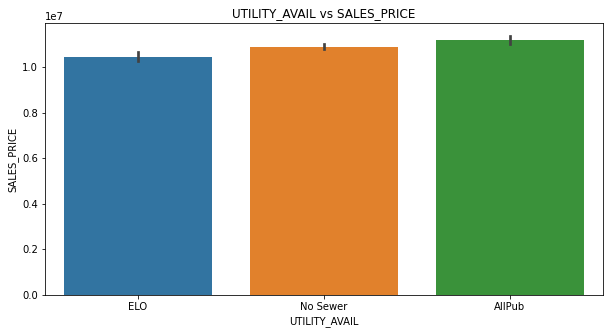

In [ ]:
plt.figure(figsize=(10,5))
plt.title("UTILITY_AVAIL vs SALES_PRICE")
sns.barplot(x='UTILITY_AVAIL',y='SALES_PRICE',data=data1,order=data1.groupby('UTILITY_AVAIL')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['UTILITY_AVAIL'])

* From the above plot, there is a **linear relationship** between the three categories.


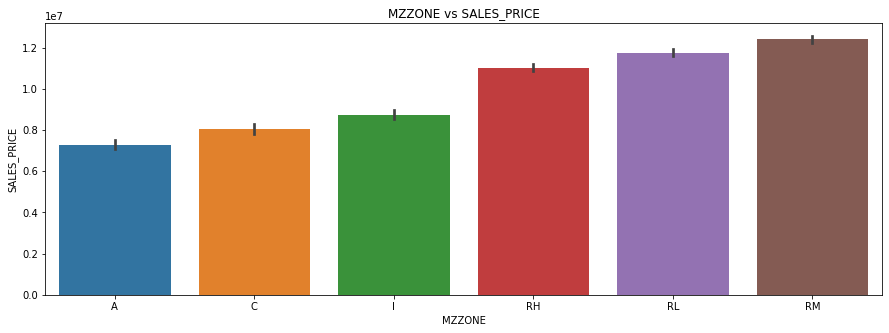

In [ ]:
plt.figure(figsize=(15,5))
plt.title("MZZONE vs SALES_PRICE")
sns.barplot(x='MZZONE',y='SALES_PRICE',data=data1,order=data1.groupby('MZZONE')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['MZZONE'])

* From the above plot, there is a **linear relationship** between the six different zones.

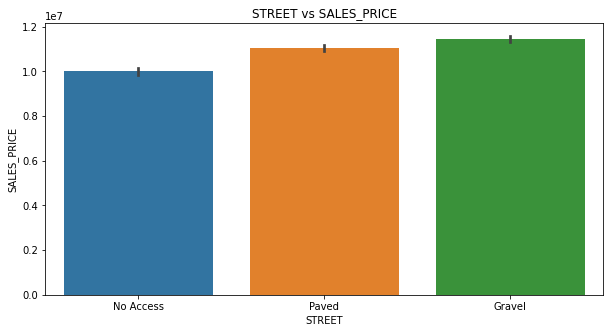

In [ ]:
plt.figure(figsize=(10,5))
plt.title("STREET vs SALES_PRICE")
sns.barplot(x='STREET',y='SALES_PRICE',data=data1,order=data1.groupby('STREET')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['STREET'])

* From the above plot, there is a **linear relationship** between the three categories.

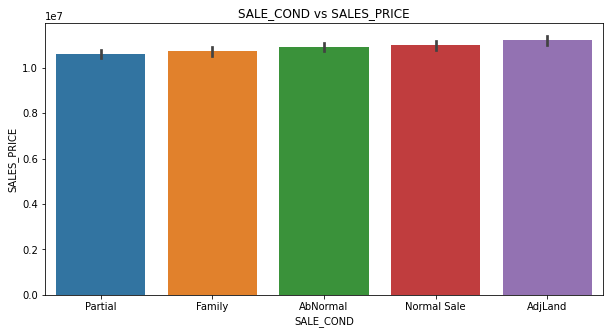

In [ ]:
plt.figure(figsize=(10,5))
plt.title("SALE_COND vs SALES_PRICE")
sns.barplot(x='SALE_COND',y='SALES_PRICE',data=data1,order=data1.groupby('SALE_COND')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['SALE_COND'])

* From the above plot, there is a **linear relationship** between the six different categories.

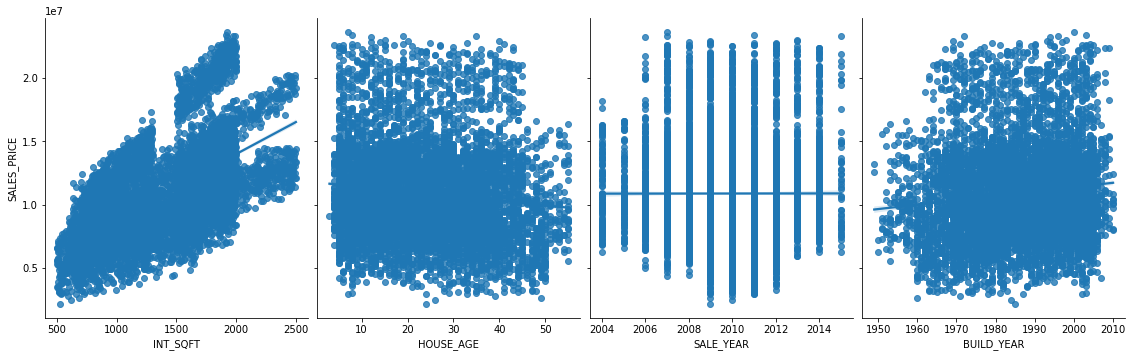

In [ ]:
sns.pairplot(data1,x_vars=["INT_SQFT", "HOUSE_AGE","SALE_YEAR","BUILD_YEAR"], y_vars=["SALES_PRICE"],
             height=5,aspect=.8,kind="reg")
plt.show()

* From the above plots, Only **"INT_SQFT"** has the clear **linear relationship** with the target_variable('SALES_PRICE').

In [ ]:
data1.drop(["SALE_YEAR","BUILD_YEAR","HOUSE_AGE"],axis=1,inplace =True)

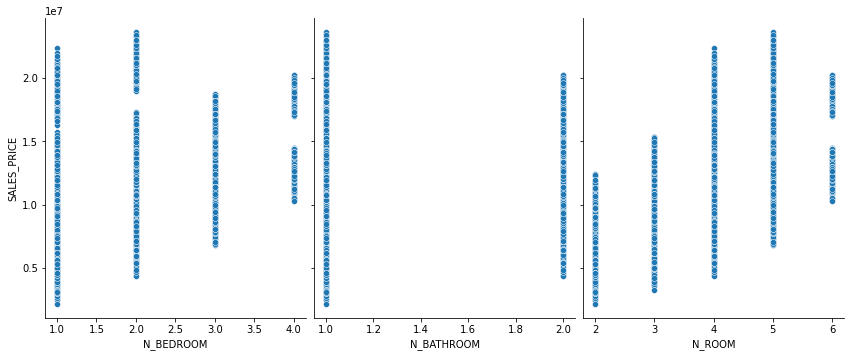

In [ ]:
sns.pairplot(data1,x_vars=["N_BEDROOM", "N_BATHROOM","N_ROOM"], y_vars=["SALES_PRICE"],
             height=5, aspect=.8, kind="scatter")
plt.show()

* From the above plots, **("N_ROOMS","N_BEDROOM")** has the **linear relationship** with the target_variable(SALES_PRICE). But **"N_BATHROOM"** has **no linear relationship** with the target_variable('SALES_PRICE').

In [ ]:
data1.drop(["N_BATHROOM"],axis=1,inplace =True)

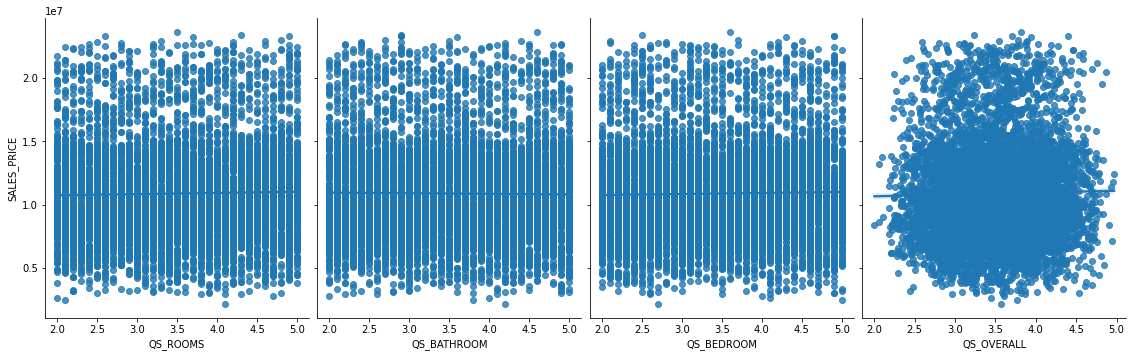

In [ ]:
sns.pairplot(data1,x_vars=["QS_ROOMS", "QS_BATHROOM","QS_BEDROOM","QS_OVERALL"], y_vars=["SALES_PRICE"],height=5, aspect=.8, kind="reg")
plt.show()

* From the above plots, **No features** has the **linear relationship** with the target_variable('SALES_PRICE').

In [ ]:
data1.drop(["DATE_SALE","DATE_BUILD","QS_ROOMS","QS_BATHROOM","QS_BEDROOM","QS_OVERALL"],axis=1,inplace = True)


---
---



**Encoding the data**

***Label encoding***

In [ ]:
data1["AREA"].replace(["Karapakkam","Adyar","Chrompet","Velachery","KK Nagar","Anna Nagar","T Nagar"],[1,2,3,4,5,6,7],inplace=True)
data1["UTILITY_AVAIL"].replace(["ELO","No Sewer","AllPub"],[1,2,3],inplace=True)
data1["PARK_FACIL"].replace(["Yes","No"],[1,0],inplace=True)
data1["SALE_COND"].replace(["Partial","Family","AbNormal","Normal Sale","AdjLand"],[1,2,3,4,5],inplace=True)
data1["STREET"].replace(["No Access","Paved","Gravel"],[1,2,3],inplace=True)
data1["MZZONE"].replace(["A","C","I","RH","RL","RM"],[1,2,3,4,5,6],inplace =True)

***Onehot encoding***

In [ ]:
data1 = pd.get_dummies(data1, columns = ["BUILDTYPE"])

***Train_Test_Split***

In [ ]:
from sklearn.model_selection import train_test_split
X=data1.drop(['SALES_PRICE'],axis=1)
y=data1['SALES_PRICE']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5687, 13), (1422, 13), (5687,), (1422,))



---



---



***Correlation***

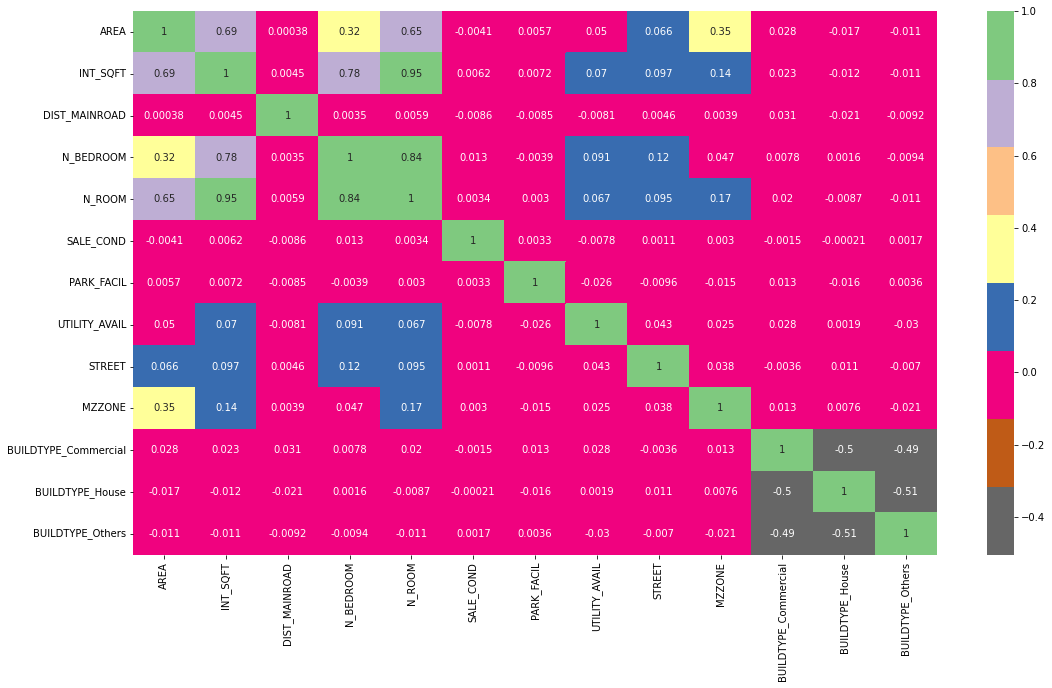

In [ ]:
plt.figure(figsize=(18,10))
cor = X_train.corr()
sns.heatmap(cor, annot=True,cmap=plt.cm.Accent_r)
plt.show()

**Finding highly correlated features**

In [ ]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are use absolute() to even focus on -ve coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [ ]:
corr_features = correlation(X_train, 0.9)
print(corr_features)

{'N_ROOM'}


In [ ]:
X_train_new = X_train.drop(["N_ROOM"],axis=1)
X_test_new = X_test.drop(["N_ROOM"],axis=1)

In [ ]:
train = pd.concat([X_train_new,y_train],axis=1)
test = pd.concat([X_test_new,y_test],axis=1)

In [ ]:
new_data1=pd.concat([train,test],axis=0)
new_data1.shape

(7109, 13)



---



---



**Finding the best features**

In [ ]:
x1=new_data1.drop(['SALES_PRICE'],axis=1)
y1=new_data1['SALES_PRICE']

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(x1,y1,test_size=0.20)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5687, 12), (1422, 12), (5687,), (1422,))

AREA                    0.430064
INT_SQFT                0.389176
BUILDTYPE_Commercial    0.187768
N_BEDROOM               0.178639
MZZONE                  0.146329
BUILDTYPE_House         0.084478
BUILDTYPE_Others        0.037165
PARK_FACIL              0.028823
STREET                  0.024057
UTILITY_AVAIL           0.010102
DIST_MAINROAD           0.000000
SALE_COND               0.000000
dtype: float64

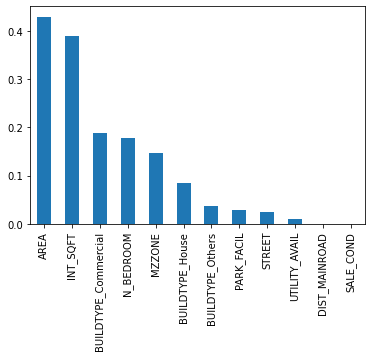

In [ ]:
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import SelectKBest, chi2, f_regression
mutual_info = mutual_info_regression(X_train,y_train)
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending = False).plot(kind ="bar")
mutual_info.sort_values(ascending = False)

In [ ]:
x1.drop(["SALE_COND","DIST_MAINROAD"],axis = 1,inplace=True)


---

---

**Feature scaling**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train,X_test,y_train,y_test=train_test_split(x1,y1,test_size=0.20,random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


---

---

**Model fitting with feature scaled data**

***Linear Regression***

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
LR=LinearRegression()
LR.fit(X_train_scaled,y_train)
LR_y_pred=LR.predict(X_test_scaled)
print(r2_score(y_test,LR_y_pred))

0.8995999047309708


***Cross validation for Linear Regression***

In [ ]:
from sklearn.model_selection import cross_val_score
CV_Linear_regression = cross_val_score(LR,X_train_scaled,y_train,cv=10).mean()
print("The cross_validation score of an Linear_Regression model is:",CV_Linear_regression)

The cross_validation score of an Linear_Regression model is: 0.9012635501608806



---
---

***XG_Boost Regression*** 

In [ ]:
import xgboost as xg
XG= xg.XGBRegressor(colsample_bytree=0.4,
                 gamma=2,                 
                 learning_rate=0.01,
                 max_depth=4,
                 min_child_weight=1.5,
                 n_estimators=10000, )
XG.fit(X_train_scaled,y_train)
xg_y_pred=XG.predict(X_test_scaled)
print("XGBoost model Rsquared metric:",r2_score(y_test,xg_y_pred))

[05:09:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBoost model Rsquared metric: 0.9912313907103197


***Cross validation for XG_Boost***


In [ ]:
CV_XG_Boost = cross_val_score(XG,X_train_scaled,y_train,cv=10).mean()
print("The cross_validation score of an XG_Boost model is:",CV_XG_Boost)

[05:09:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:10:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:10:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:10:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:11:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:11:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:11:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:12:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re


---
---

***Random Forest Regressor***

In [ ]:
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor(n_estimators= 1000, max_depth = 10, max_features='sqrt')
RF.fit(X_train_scaled, y_train)
rf_pred = RF.predict(X_test_scaled)
print("Random forest Regressor model Rsquared metric",r2_score(y_test,rf_pred))

Random forest Regressor model Rsquared metric 0.9820299911596897


***Cross validation for Random Forest Regressor***

In [ ]:
CV_RandomForest = cross_val_score(RF,X_train_scaled,y_train,cv=10).mean()
print("The cross_validation score of an RandomForest model is:",CV_RandomForest)

The cross_validation score of an RandomForest model is: 0.9836018510487428


**RESULT:**

* From the above result, XG_BOOST Regressor predicted well than Randomforest Regressor and Linear Regressor.

* XG_BOOST Regressor model r2 value is close 1.

* Randomforest Regressor model r2 value is 0.98.

* Linear Regressor model r2 value is 0.90.




---
---

**Model fitting without feature scaled data**

This model fitting is used for Price range prediction.

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2, f_regression
select_top_features = SelectKBest(mutual_info_regression,k=7)
select_top_features.fit(X_train,y_train)
X_train.columns[select_top_features.get_support()]

Index(['AREA', 'INT_SQFT', 'N_BEDROOM', 'MZZONE', 'BUILDTYPE_Commercial',
       'BUILDTYPE_House', 'BUILDTYPE_Others'],
      dtype='object')

In [ ]:
X_train.columns

Index(['AREA', 'INT_SQFT', 'N_BEDROOM', 'PARK_FACIL', 'UTILITY_AVAIL',
       'STREET', 'MZZONE', 'BUILDTYPE_Commercial', 'BUILDTYPE_House',
       'BUILDTYPE_Others'],
      dtype='object')

In [ ]:
X_train.drop(["PARK_FACIL","STREET","UTILITY_AVAIL"],axis = 1,inplace =True)
X_test.drop(["PARK_FACIL","STREET","UTILITY_AVAIL"],axis = 1,inplace =True)


---

---

***Linear Regression*** 

In [ ]:
linear = LinearRegression()
linear.fit(X_train, y_train)
linear_pred = linear.predict(X_test)
print("Linear Regressor model Rsquared metric : ",r2_score(y_test,linear_pred))

Linear Regressor model Rsquared metric :  0.8680445505978477



---

---

***Random Forest Regressor***

In [ ]:
RF1 = RandomForestRegressor(n_estimators= 1000, max_depth = 10, max_features='sqrt')
RF1.fit(X_train, y_train)
RF1_pred = RF1.predict(X_test)
print("Random forest Regressor model Rsquared metric : ",r2_score(y_test,RF1_pred))

Random forest Regressor model Rsquared metric :  0.9517551948707081


From the above result RandomForest Regressor predicted well than linear regressor. So that Randomforest regressor is used for price range prediction.


---

---

**Finding standard deviation of SALES_PRICE**

In [ ]:
print("standard deviation of (SALES_PRICE) :",data1["SALES_PRICE"].std())

standard deviation of (SALES_PRICE) : 3768603.4570030593




---



---



In [ ]:
X_train.columns

Index(['AREA', 'INT_SQFT', 'N_BEDROOM', 'MZZONE', 'BUILDTYPE_Commercial',
       'BUILDTYPE_House', 'BUILDTYPE_Others'],
      dtype='object')

Taking the above best 7 features only for price range prediction.

**Price Range Prediction**

In [ ]:
from babel.numbers import format_currency
P_Range = RF1.predict([[1,1500,1,2,1,0,0]])
min = int(P_Range - (data1["SALES_PRICE"].std()))
min = format_currency( min, 'INR', locale='en_IN')
max = int(P_Range + (data1["SALES_PRICE"].std()))
max = format_currency(max, 'INR', locale='en_IN')
print('Price range is:', min , 'to' , max)

Estimated value is: ₹59,13,146.00 to ₹1,34,50,353.00


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"


From the above details, P_Range = RF1.predict([[1,1500,1,2,1,0,0]])
RF1 --> Randomforest Regressor model.

The features used for predictions are
* AREA --> "Karapakkam": 1,"Adyar": 2,"Chrompet": 3,"Velachery": 4,"KK Nagar": 5,"Anna Nagar": 6,"T Nagar": 7.
* INT_SQFT : ranges from 500 to 2500
* N_BEDROOM : 1 ,2 ,3 ,4 .
* MZZONE : "A": 1,"C": 2,"I": 3,"RH": 4,"RL": 5,"RM": 6.
* BUILDTYPE_Commercial : if buildtype is commercial enter 1 otherwise enter 0.
* BUILDTYPE_House: if buildtype is house enter 1 otherwise enter 0.
* BUILDTYPE_Others : if buildtype is others enter 1 otherwise
enter 0.


**Final interpretation**
 
* Area feature is the important feature. if you want to buy or build house Tnagar area is more value than the others and karapakkam area is least value than others.

* Next important feature is square feet. if square feet increases pricee will also increases.

* Next important feature is Buildtype. There are three different types(or) categories in buildtype. Buildtype_commercial having high value than other two types.

* Next important feature is MZZONE. in this feature there is an increasing order with the zones like "A": 1,"C": 2,"I": 3,"RH": 4,"RL": 5,"RM": 6. if u want to buy or build in RM zone the price range is higher than the other zones.

* check the price range for your requirements with the help of above details to predict the price range.

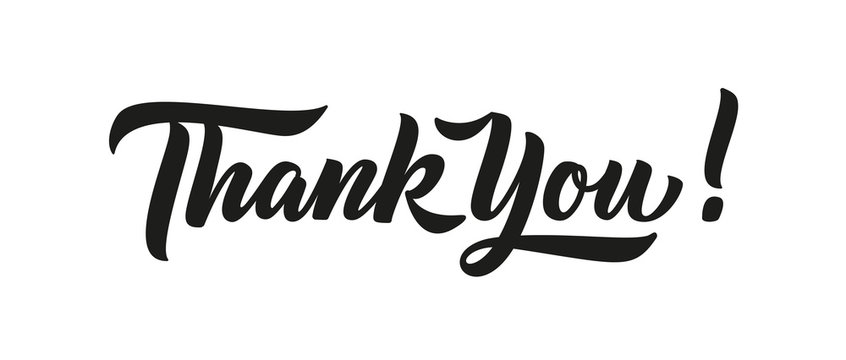